In [1]:
import pandas as pd
from wordcloud import WordCloud 
import pickle
import matplotlib.pyplot as plt

In [2]:
def get_sentiments(x,sent_dict):
    '''
    x:         List
               Input data: Row of a DataFrame
    sent_dict: Dictionary
               Input: Dictionary of Words: Sentiments
    sentiment: String
               Output: Sentiment of the whole sentence
    
    Function: Getting sentiments of the entire sentence by averaging out the sentiments of individual words
    '''
    total=0
    count=0
    test=x["lemmatized"]
    for t in test:
        if words_dict.get(t):
            total+=int(sent_dict.get(t))
        count+=1 
    avg=total/count
    sentiment=-1 if avg<-0.05 else 1 if avg >0.05 else 0
    return sentiment

In [3]:
with open('model.pkl', 'rb') as f:
    words_dict = pickle.load(f)
df = pd.read_csv('test.csv')
df["sentiment"] = df.apply(get_sentiments,args=(words_dict,),axis=1)
df.head()

,date,tweet,lemmatized,prepped,no_stop,sentiment
0,2022-05-02,this is how hex made the crypto market appear ...,"['this', 'is', 'how', 'hex', 'made', 'the', 'c...",alpha thrust bullish daily reversal best combo...,"['alpha', 'thrust', 'bullish', 'daily', 'rever...",-1
1,2022-05-02,new improved entityadjusted supply distributio...,"['new', 'improved', 'entityadjusted', 'supply'...",austin bitcoiners need help join u thursday au...,"['austin', 'bitcoiners', 'need', 'help', 'join...",0
2,2022-05-02,bitboycrypto i first learned about bitcoin at ...,"['bitboycrypto', 'i', 'first', 'learned', 'abo...",mikealfred cardano swipe wa really weak dont e...,"['mikealfred', 'cardano', 'swipe', 'wa', 'real...",0
3,2022-05-02,vechain vet yesterday vechainthor accounts ...,"['vechain', 'vet', 'yesterday', 'vechainthor',...",coachpbtc intocryptoverse bitcoin orange chip ...,"['coachpbtc', 'intocryptoverse', 'bitcoin', 'o...",0
4,2022-05-02,satoshisarah nobody owns it thats why theres c...,"['satoshisarah', 'nobody', 'owns', 'it', 'that...",bitcoin go,"['bitcoin', 'go']",0


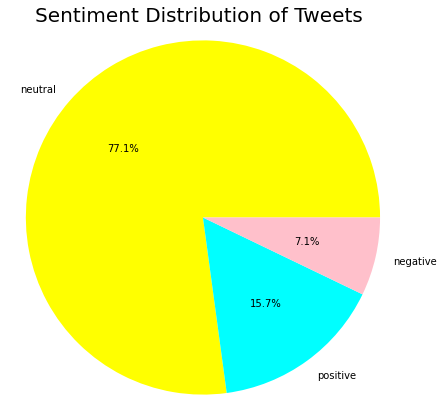

,index,sentiments_val
0,neutral,270
1,positive,55
2,negative,25


In [4]:
# Plotting pie chart of Sentiment Distribution of tweets
emotion = {0: "neutral",
           1: "positive",
          -1: "negative"}

df["sentiments_val"] = df["sentiment"].map(emotion)
df_pie = df["sentiments_val"].value_counts().reset_index()
fig = plt.gcf()
fig.set_size_inches(7,7)
colors = ["yellow","cyan","pink"]
plt.pie(df_pie["sentiments_val"],labels=df_pie["index"],radius=2,autopct="%1.1f%%", colors=colors)
plt.axis('equal')
plt.title("Sentiment Distribution of Tweets ", fontsize=20)
#plt.savefig("images/Sentiment_Distribution.png")
plt.show()
df_pie

In [5]:
def create_wordcloud(text):
    words=' '.join([words for words in text])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

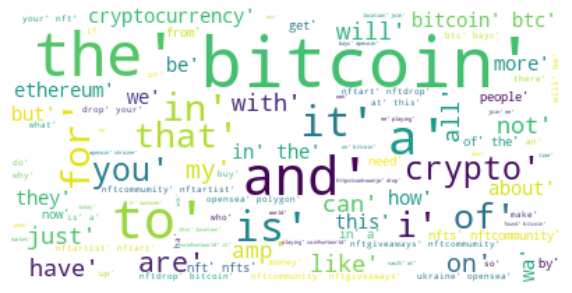

In [6]:
create_wordcloud(df["lemmatized"].values)

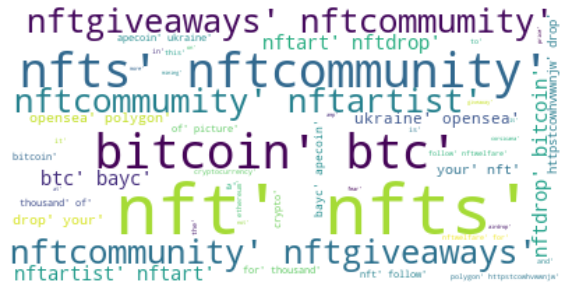

In [9]:
create_wordcloud(df[df["sentiment"]==1]["lemmatized"].values)